<a href="https://colab.research.google.com/github/MdShahadatHossainbd/ML-PROJECT/blob/main/ML_project_0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [58]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [59]:
train = pd.read_csv('/content/gdrive/MyDrive/archive/drugsComTrain_raw.csv') #train data
test = pd.read_csv('/content/gdrive/MyDrive/archive/drugsComTest_raw.csv') #test data


In [60]:
#check the head of train data
train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [61]:
#check the head of test data
test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [62]:
#check the shape of the given dataset
print(f'train has {train.shape[0]} number of rows and {train.shape[1]} number of columns')
print(f'train has {test.shape[0]} number of rows and {test.shape[1]} number of columns')

train has 161297 number of rows and 7 number of columns
train has 53766 number of rows and 7 number of columns


In [63]:
#check the columns in train
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [64]:
#merge train and test data

merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)

merged_data.shape   #check the shape of merged_data

(215063, 7)

In [65]:
#check uniqueID
merged_data['uniqueID'].nunique()

215063

In [66]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


In [67]:
merged_data.describe(include='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,215063.000000,215063,213869,215063,215063.000000,215063,215063.000000
unique,NaN,3671,916,128478,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,4930,38436,39,NaN,185,NaN
mean,116039.364814,NaN,NaN,NaN,6.990008,NaN,28.001004
std,67007.913366,NaN,NaN,NaN,3.275554,NaN,36.346069
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58115.500000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115867.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173963.500000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [68]:
merged_data.isnull().sum()/merged_data.shape[0]

uniqueID       0.000000
drugName       0.000000
condition      0.005552
review         0.000000
rating         0.000000
date           0.000000
usefulCount    0.000000
dtype: float64

In [69]:
#check number of unique values in drugName
print(merged_data['drugName'].nunique())

#check number of unique values in condition
print(merged_data['condition'].nunique())

3671
916


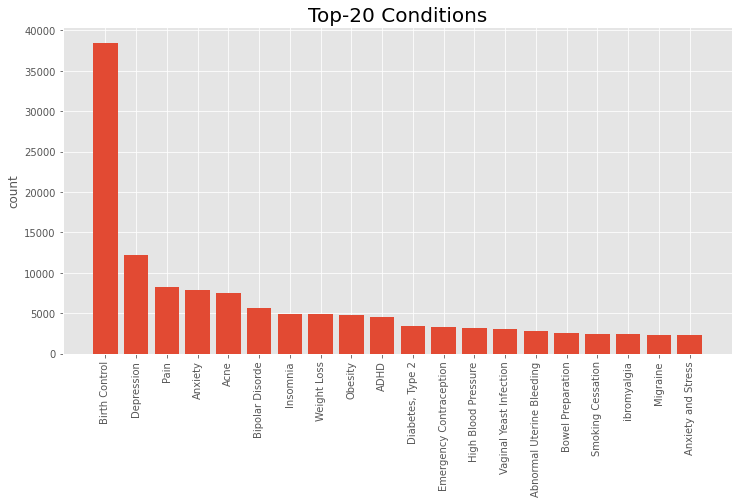

In [70]:
#plot a bargraph to check top 20 conditions
plt.figure(figsize=(12,6))
conditions = merged_data['condition'].value_counts(ascending = False).head(20)

plt.bar(conditions.index,conditions.values)
plt.title('Top-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

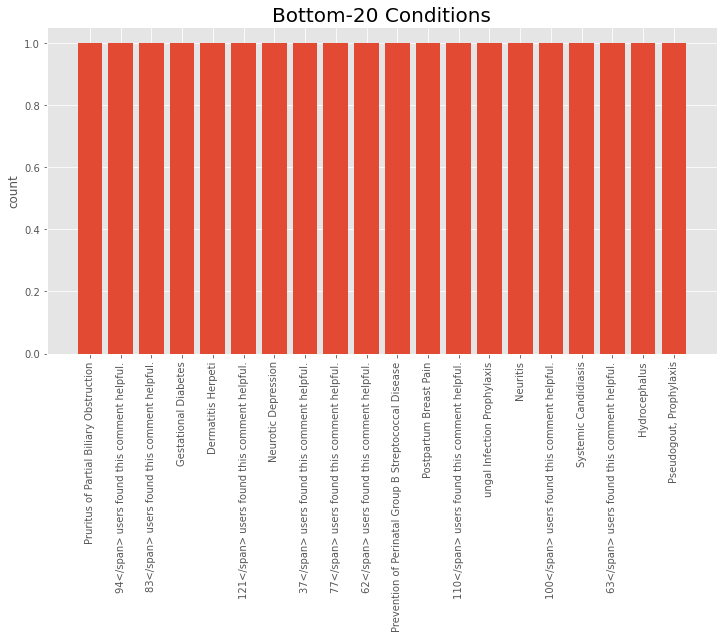

In [71]:
#plot a bargraph to check bottom 20 conditions
plt.figure(figsize=(12,6))
conditions_bottom = merged_data['condition'].value_counts(ascending = False).tail(20)

plt.bar(conditions_bottom.index,conditions_bottom.values)
plt.title('Bottom-20 Conditions',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

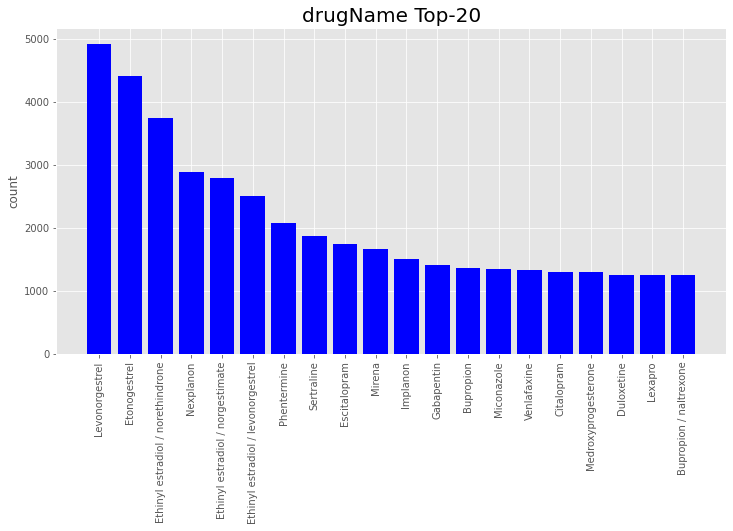

In [72]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_top = merged_data['drugName'].value_counts(ascending = False).head(20)

plt.bar(drugName_top.index,drugName_top.values,color='blue')
plt.title('drugName Top-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

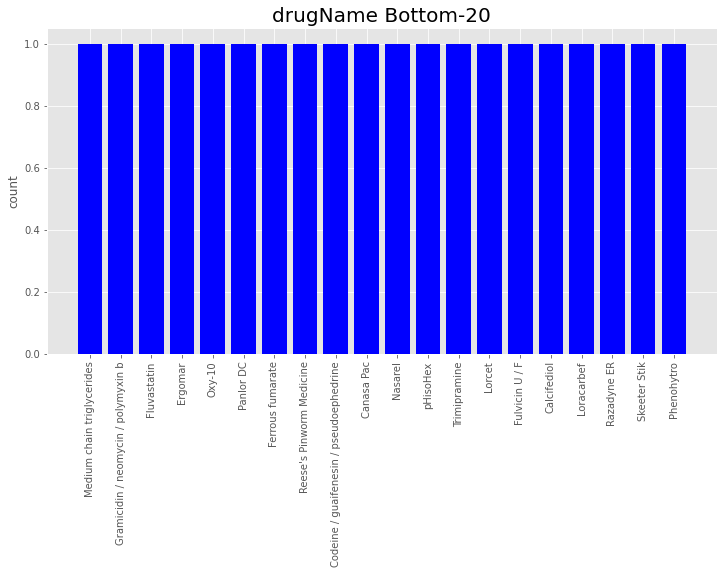

In [73]:
#plot a bargraph to check top 20 drugName
plt.figure(figsize=(12,6))
drugName_bottom = merged_data['drugName'].value_counts(ascending = False).tail(20)

plt.bar(drugName_bottom.index,drugName_bottom.values,color='blue')
plt.title('drugName Bottom-20',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [74]:
#Checking Ratings Distribution
ratings_ = merged_data['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/merged_data.shape[0])
print(ratings_)

   rating  counts    percent
0      10   68005  31.620967
1       9   36708  17.068487
2       1   28918  13.446292
3       8   25046  11.645890
4       7   12547   5.834104
5       5   10723   4.985981
6       2    9265   4.308040
7       3    8718   4.053696
8       6    8462   3.934661
9       4    6671   3.101882


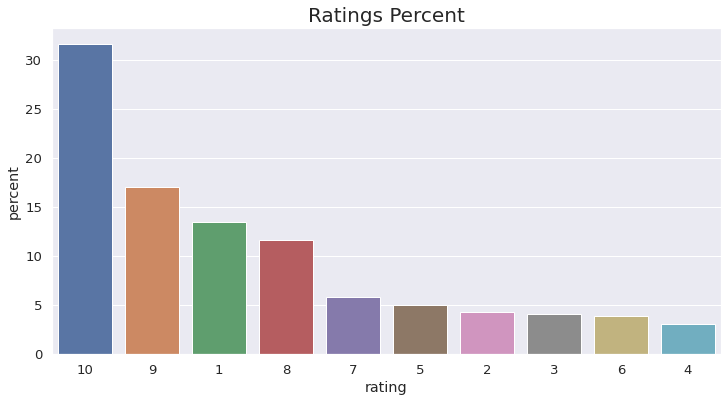

In [75]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

#let's plot and check
sns.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'])
plt.title('Ratings Percent',fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


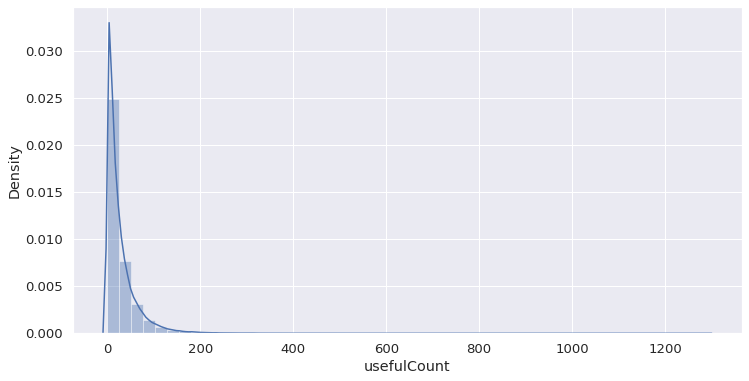

In [76]:
#Check the distribution of usefulCount
#plot a distplot of usefulCount
sns.distplot(merged_data['usefulCount'])
plt.show()

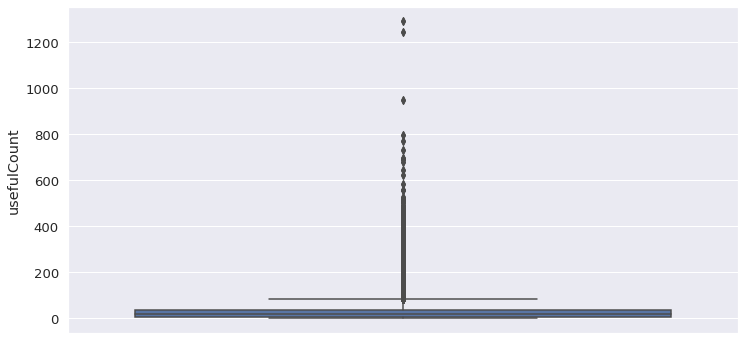

In [77]:
#check the descriptive summary
sns.boxplot(y = merged_data['usefulCount'])
plt.show()

In [78]:
#lets check the number of drugs/condition
merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(20)

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

In [79]:
span_data = merged_data[merged_data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/merged_data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))

Number of rows with </span> values :  1171
Total percent of noisy data 0.5444916140851751 %  


In [80]:
#drop the nosie 
merged_data.drop(span_data.index, axis = 0, inplace=True)

In [81]:
#check the percentage of 'not listed / othe' conditions
not_listed = merged_data[merged_data['condition'] == 'not listed / othe']
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/merged_data.shape[0]
print('Total percent of noisy data {} %  '.format(percent_not_listed))

Number of not_listed values :  0
Total percent of noisy data 0.0 %  


In [82]:
# drop noisy data
merged_data.drop(not_listed.index, axis = 0, inplace=True)

In [83]:
# after removing the noise, let's check the shape
merged_data.shape[0]

213892

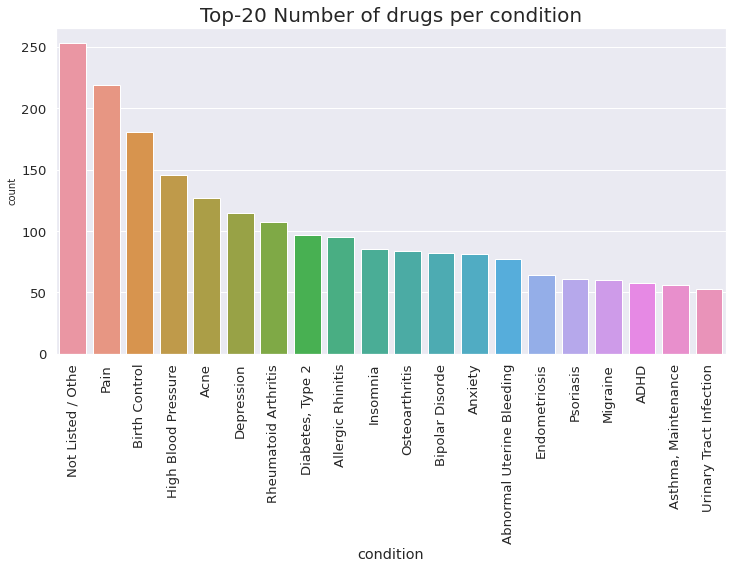

In [84]:
#lets check the number of drugs present in our dataset condition wise
conditions_gp = merged_data.groupby('condition')['drugName'].nunique().sort_values(ascending=False)

#plot the top 20
# Setting the Parameter
condition_gp_top_20 = conditions_gp.head(20)
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
sns.barplot(x = condition_gp_top_20.index, y = condition_gp_top_20.values)
plt.title('Top-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

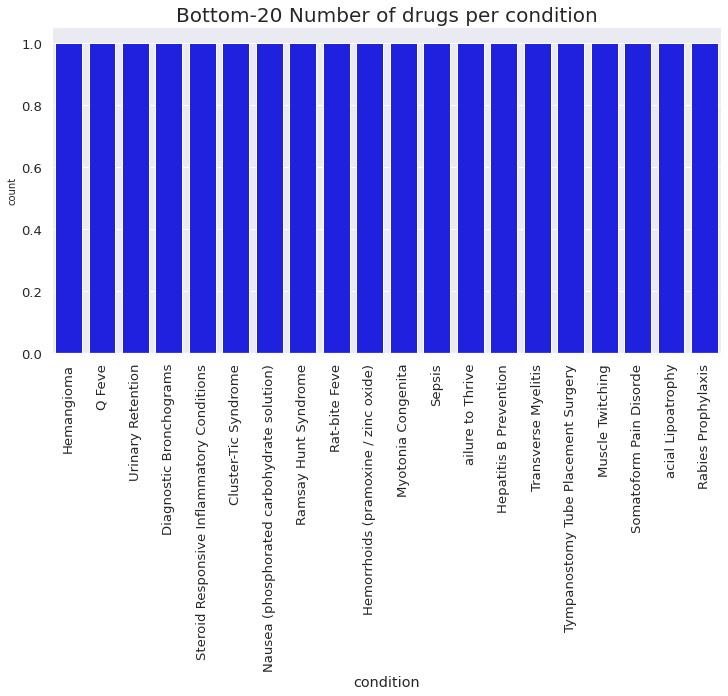

In [85]:
#bottom-20
condition_gp_bottom_20 = conditions_gp.tail(20)
#plot the top 20

sns.barplot(x = condition_gp_bottom_20.index, y = condition_gp_bottom_20.values,color='blue')
plt.title('Bottom-20 Number of drugs per condition',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('count',fontsize=10)
plt.show()

In [86]:
#let's check if a single drug is used for multiple conditions
drug_multiple_cond = merged_data.groupby('drugName')['condition'].nunique().sort_values(ascending=False)
print(drug_multiple_cond.head(10))


drugName
Prednisone       39
Gabapentin       31
Ciprofloxacin    25
Doxycycline      25
Amitriptyline    24
Metronidazole    23
Venlafaxine      23
Dexamethasone    22
Triamcinolone    20
Azithromycin     20
Name: condition, dtype: int64


In [87]:
#Let's check the Number of drugs with rating 10.
merged_data[merged_data['rating'] == 10]['drugName'].nunique()

2914

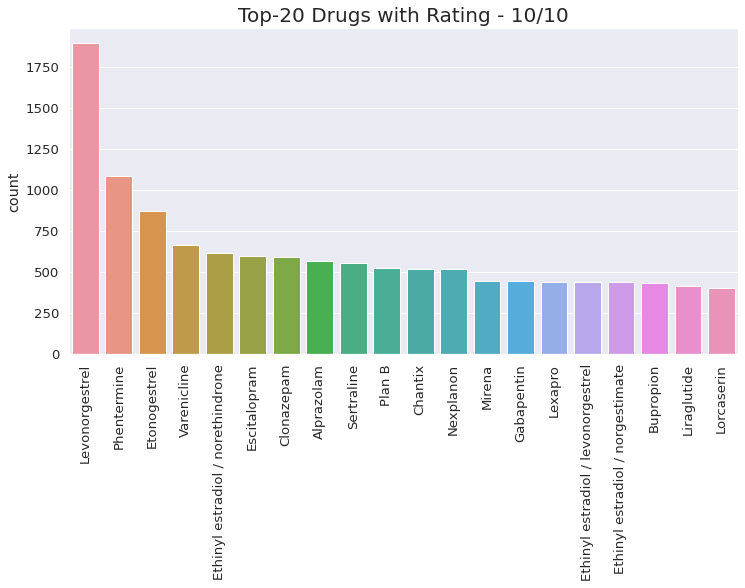

In [88]:
#Check top 20 drugs with rating=10/10
top_20_ratings = merged_data[merged_data['rating'] == 10]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings.index, y = top_20_ratings.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 10/10', fontsize=20)
plt.ylabel('count')
plt.show()

In [89]:
merged_data[merged_data['drugName'] == 'Levonorgestrel']['condition'].unique()

array(['Emergency Contraception', 'Birth Control',
       'Abnormal Uterine Bleeding', nan, 'Not Listed / Othe'],
      dtype=object)

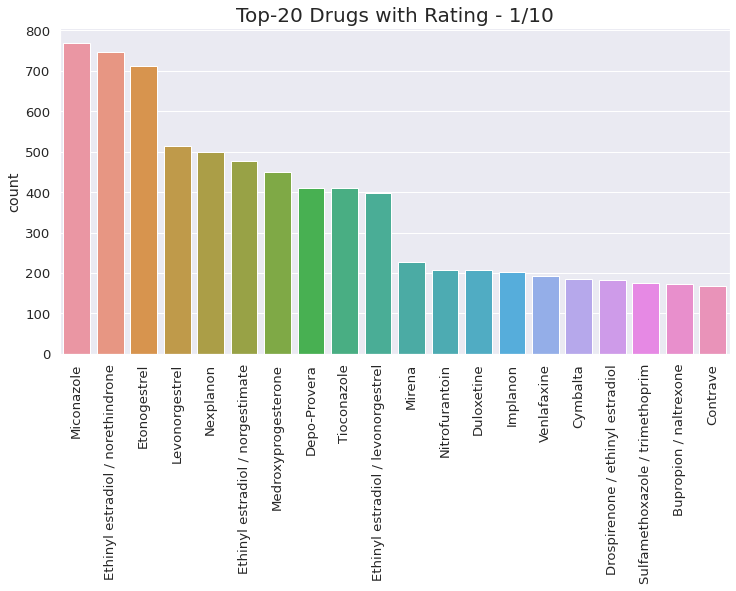

In [90]:
#check top 20 drugs with 1/10 rating

top_20_ratings_1 = merged_data[merged_data['rating'] == 1]['drugName'].value_counts().head(20)
sns.barplot(x = top_20_ratings_1.index, y = top_20_ratings_1.values )
plt.xticks(rotation=90)
plt.title('Top-20 Drugs with Rating - 1/10', fontsize=20)
plt.ylabel('count')
plt.show()

In [91]:
# convert date to datetime and create year andd month features

merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['year'] = merged_data['date'].dt.year  #create year
merged_data['month'] = merged_data['date'].dt.month #create month

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


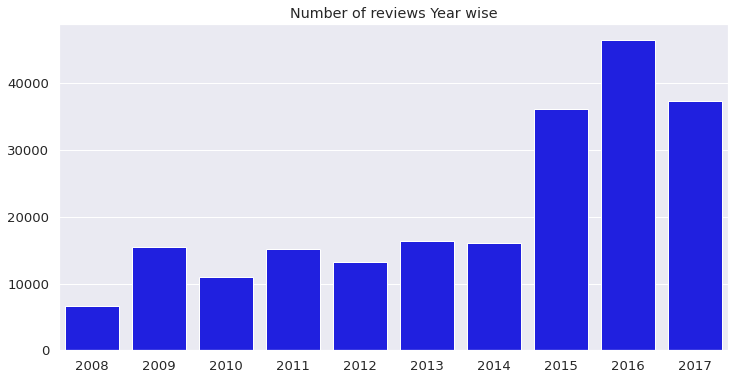

In [92]:
#plot number of reviews year wise
count_reviews = merged_data['year'].value_counts().sort_index()
sns.barplot(count_reviews.index,count_reviews.values,color='blue')
plt.title('Number of reviews Year wise')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


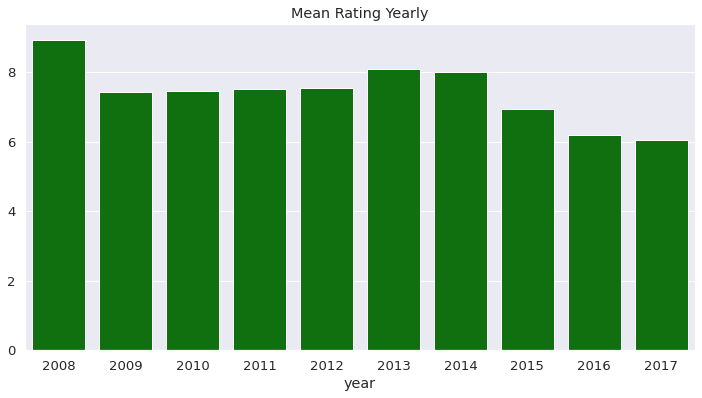

In [93]:
#check average rating per year
yearly_mean_rating = merged_data.groupby('year')['rating'].mean()
sns.barplot(yearly_mean_rating.index,yearly_mean_rating.values,color='green')
plt.title('Mean Rating Yearly')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


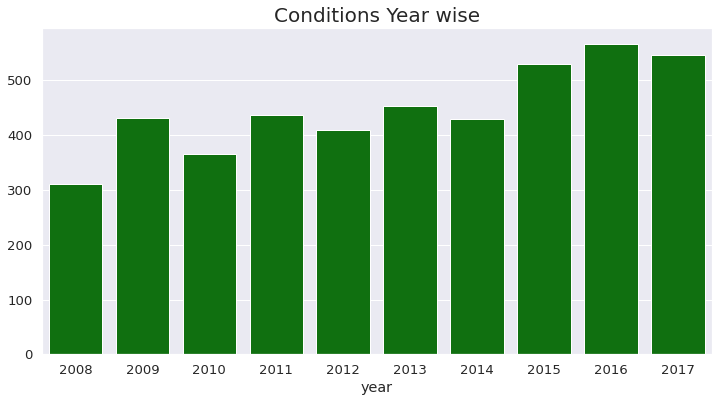

In [94]:
#check year wise drug counts and year wise conditions counts

year_wise_condition = merged_data.groupby('year')['condition'].nunique()
sns.barplot(year_wise_condition.index,year_wise_condition.values,color='green')
plt.title('Conditions Year wise',fontsize=20)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


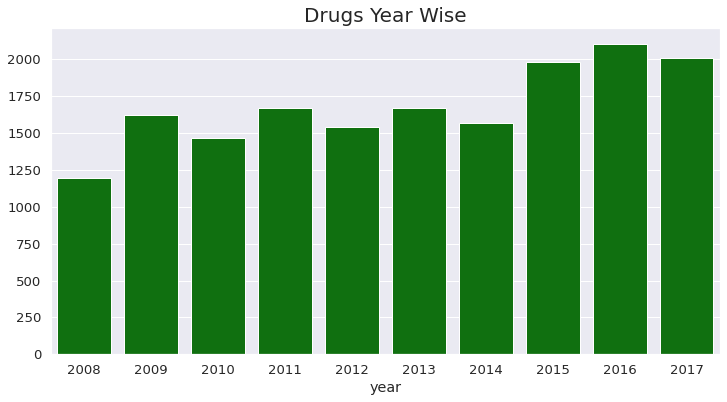

In [95]:
#check drugs year wise

year_wise_drug = merged_data.groupby('year')['drugName'].nunique()
sns.barplot(year_wise_drug.index,year_wise_drug.values,color='green')
plt.title('Drugs Year Wise',fontsize=20)
plt.show()

In [96]:
#Data Pre-Processing
# check the null values
merged_data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
year              0
month             0
dtype: int64

In [97]:
# drop the null values
merged_data.dropna(inplace=True, axis=0)

In [98]:
#check first three reviews
for i in merged_data['review'][0:3]:
    print(i,'\n')

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil" 

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective." 

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestod

In [99]:
#import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))


In [100]:
#apply review_to_words function on reviews
merged_data['review'] = merged_data['review'].apply(review_to_words)

In [101]:
#create sentiment feature from ratings
#if rating > 5 sentiment = 1 (positive)
#if rating < 5 sentiment = 0 (negative)
merged_data['sentiment'] = merged_data["rating"].apply(lambda x: 1 if x > 5 else 0)

In [102]:
#Building Model
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

In [103]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(merged_data.review)
reviews_corpus.shape

(212698, 34709)

In [104]:
#dependent feature
sentiment = merged_data['sentiment']
sentiment.shape

(212698,)

In [105]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.33,random_state=42)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (142507, 34709) (142507,)
Test data shape  (70191, 34709) (70191,)


In [106]:
#Multinomial Naive Bayes
#fit the model and predicct the output

clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 0.7589719479705376
Confusion Matrix
[[ 4506   646]
 [16272 48767]]


In [107]:
#RandomForestClassifier
#fit the model and predicct the output

clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.8957558661366842
Confusion Matrix
[[13994   533]
 [ 6784 48880]]
